Best material : https://medium.com/@stevenyu530_73989/stacking-and-blending-intuitive-explanation-of-advanced-ensemble-methods-46b295da413c

## Difference between stacking and blending

- Stacking and blending are two ensemble learning techniques used to improve the performance of machine learning models.


- Stacking is a technique where multiple models are trained on the same dataset and then used to make predictions. These predictions are then used as inputs to a higher-level model (also called a meta-model) that makes the final prediction.



- Blending is similar to stacking, but instead of using the predictions of the base models as input to a higher-level model, the base models are used to make predictions on a held-out test dataset, and these predictions are then combined to make the final prediction. Blending is often used in kaggle competition.



- In summary, stacking is using multiple models to make predictions, then using those predictions as input to a higher-level model, while blending is using multiple models to make predictions on a held-out test set and combining those predictions.

### K-fold stacking is a method of training and validating multiple models and using their predictions to train a higher-level model. Here's an example of how it might be implemented:

- Split the dataset into K folds.


- For each fold, train several base models on the other K-1 folds and make predictions on the held-out fold.


- Concatenate the predictions from all the base models on all the folds to create a new dataset.


- Train the higher-level model (meta-model) on the new dataset.


- Use the higher-level model to make predictions on new data.



### Blending is a method of combining the predictions of multiple models on a held-out test dataset. Here's an example of how it might be implemented:

- Split the dataset into training and test sets.


- Train several base models on the training set.


- Use each base model to make predictions on the test set.


- Combine the predictions from all the base models to make the final prediction. This can be done using simple averaging or 


- weighted averaging.


- Use the blended model to make predictions on new data.


It's worth noting that in both cases, the final model is usually trained using out-of-fold predictions, that is, predictions made by the base models on data that was not used for training.

In voting ensemble we take majority count for classification and mean for regression but stacking takes further steps afetr it

# Stacking

- Very similar to voting classifier or voting regressor (Voting ensemble).


- Output from different base model then goes to another model as input and the meta-model is trained on it and prediction is made

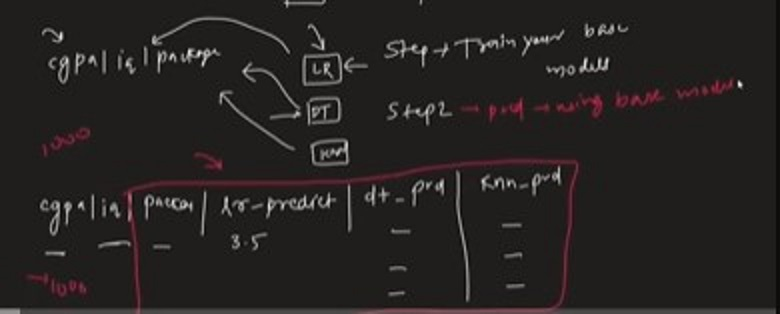

- from the intelligence of base model, the meta-model is trained. The combination is used for prediction.

### How stacking is different from Boosting or Bagging?

- <span class="mark">Base models can be different in stacking</span>. But Bagging and Boosting have same type of base models.


- We cannot directly use the output of base models. Majority count is not used in Stacking


### Probelms with Stacking:

- As same data is used again in meta-model training, <span class="mark">it can lead to Overfitting</span>
 <br></br>   
    - __can be avoided using Hold out method (Blending) or K-Fold stacking (Stacking)__

# Preventing Overfitting:

- K-Fold stacking (Stacking)


- Hold out method (Blending)

## K-Fold approach (Stacking)

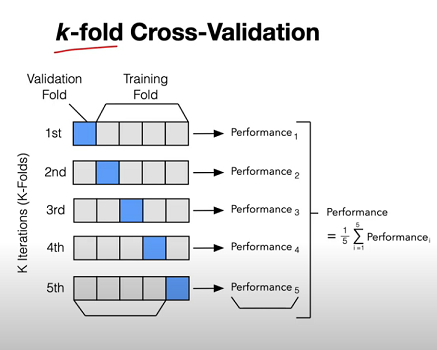

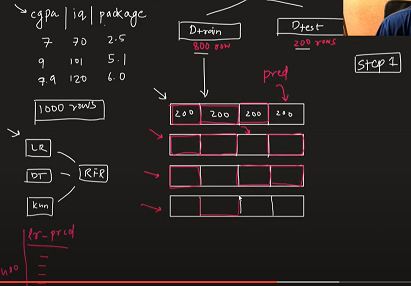

__Step 1 :__ Data will be divided into testing and training (800 and 200 rows)


__Step 2 :__ A "K" will be decided. data will be randomly divided into that many k equal folds.


__Step 3 :__ Base models will be trained on k-1 data and tested on the leftover k data. __This will repeat for each K.__


__Step 4 :__ This process will run for each base model.

- So if k =4 and base model is 3 models. Then the data will be trained 12 times. i.e all base models have trained for 4 times.

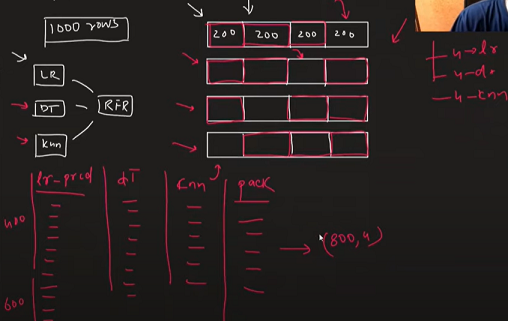

__Step 5 :__ The meta model will train on this data with actual y_train and will be tested on y_test


__<span class="mark">Step 6 :__ <span class="mark">We will retrain on $D_{train}\;$ or X_train and y_train and then get the base model. We will train the entire $D_{train}$ and y_train with linear regression, then knn, then decision tree and by it we will get our base models.</span></span>
    
#### Here we will get meta model first and then get the base models
<br>

__Step 7:__ After getting the base models, we will use the $D_{test}$ dataset will pass through the base models and using the output we will compare the r_2 score

## Hold Out Method (Blending)

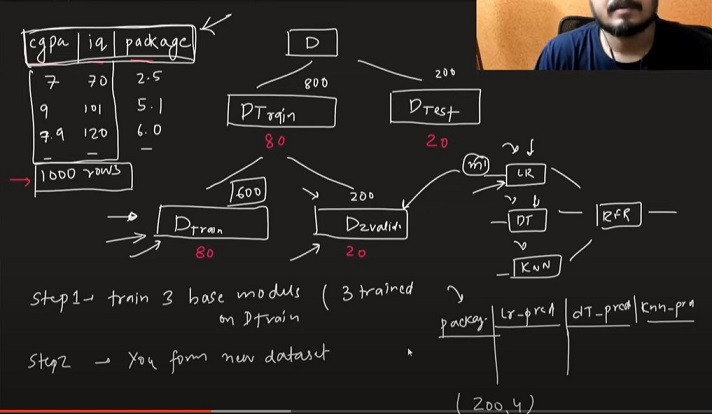

##### Step 1:  Train 3 base model with subset of training data

- $D_{train}\;and\;D_{validation}$ will be made after the second train test split which will be a subset of training data (X_train) data.


- $D_{train}\;$ is used to train base models which can be LinearRegression or Decision tree or KNN and testing will be made on $D_{validation}$

##### Step 2: Prediction will be made by the models with validation data

- All 3 base models will have same data to be trained on i.e $D_{train}$


- Testing will be done on  $D_{validation}$ 


- The new dataset after testing on $D_{validation}$ will have 4 columns (200,4):
<br></br>
    - lr_pred, dt_pred, knn_pred and the actual output values from the main dataset (y_train)


##### Step 3: train the meta model

- train the meta model on this dataset and predictions will be made.


- testing will be done on $D_{test}$ or y_test


- the r2 score will be calculated

### Multi-layer Blending

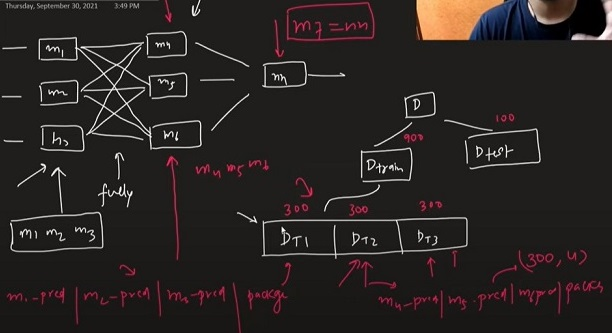

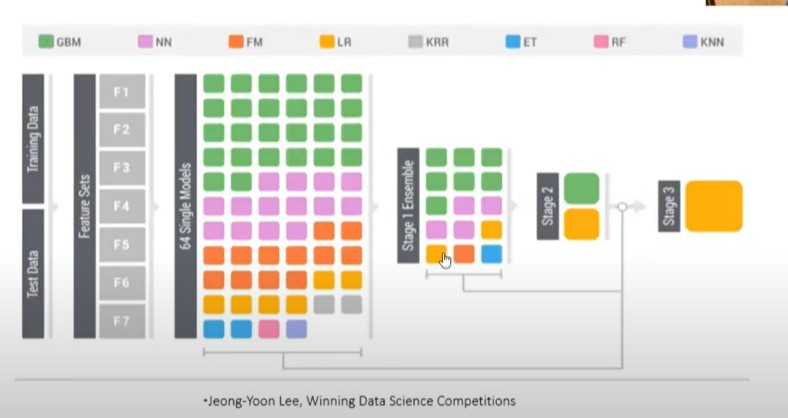

___
___
___

## Basic Stacking using Sklearn

#### 1. on heart dataset

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import *

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape

((303, 13), (303,))

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=8)

X_train.shape , X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
estimators = [
    ('rf',RandomForestClassifier(n_estimators=10,random_state=42,n_jobs=-1)),
    ('knn',KNeighborsClassifier(n_neighbors=10,n_jobs=-1)),
    ('gb',GradientBoostingClassifier())
]

In [10]:
from sklearn.ensemble import StackingClassifier

In [11]:
skf= StratifiedKFold(n_splits=10,random_state=2020,shuffle=True)

In [12]:
clf = StackingClassifier(
estimators=estimators,
final_estimator=LogisticRegression(n_jobs=-1),
cv=skf,n_jobs=-1)

In [13]:
clf.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=10, random_state=2020, shuffle=True),
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('knn',
                                KNeighborsClassifier(n_jobs=-1,
                                                     n_neighbors=10)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression(n_jobs=-1), n_jobs=-1)

In [14]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [15]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)

0.8688524590163934

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        22
           1       0.94      0.85      0.89        39

    accuracy                           0.87        61
   macro avg       0.86      0.88      0.86        61
weighted avg       0.88      0.87      0.87        61



## Note :All models should have same number of folds

___
___

#### 2. on iris dataset

#### NOTE: in the below codes it is not using validation data which is wrong and incomplete

In [13]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [14]:
iris = datasets.load_iris()
X,y = iris.data[:, [0,3]], iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.25,random_state=1)

In [18]:
X_train.shape, X_val.shape,X_test.shape, y_train.shape, y_val.shape,y_test.shape

((84, 2), (28, 2), (38, 2), (84,), (28,), (38,))

### from mlxtend.classifier using StackingClassifier 

In [32]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier 

In [33]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=1)
clf4 = AdaBoostClassifier(random_state=1)
clf5 = DecisionTreeClassifier(random_state=1)


In [34]:
lr = LogisticRegression(random_state=1)

In [35]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], meta_classifier=lr)

In [36]:
sclf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


StackingClassifier(classifiers=[KNeighborsClassifier(),
                                RandomForestClassifier(random_state=1),
                                HistGradientBoostingClassifier(random_state=1),
                                AdaBoostClassifier(random_state=1),
                                DecisionTreeClassifier(random_state=1)],
                   meta_classifier=LogisticRegression(random_state=1))

In [37]:
print('Training Accuracy: %0.2f' % sclf.score(X_train, y_train))
print('Testing Accuracy: %0.2f' % sclf.score(X_test,y_test))

Training Accuracy: 0.98
Testing Accuracy: 0.95


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### Now using StackingcvClassifier : Stacking with k-Fold validation

In [38]:
from mlxtend.classifier import StackingCVClassifier

In [53]:
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                            use_probas=True,
                            drop_proba_col='last',
                            meta_classifier=lr,
                            cv=10,
                            random_state=1,
                            n_jobs=-1)

In [54]:
sclf.fit(X_train, y_train)

StackingCVClassifier(classifiers=[KNeighborsClassifier(),
                                  RandomForestClassifier(random_state=1),
                                  HistGradientBoostingClassifier(random_state=1),
                                  AdaBoostClassifier(random_state=1),
                                  DecisionTreeClassifier(random_state=1)],
                     cv=10, drop_proba_col='last',
                     meta_classifier=LogisticRegression(random_state=1),
                     n_jobs=-1, random_state=1, use_probas=True)

In [55]:
print('Training Accuracy: %0.2f' % sclf.score(X_train, y_train))
print('Testing Accuracy: %0.2f' % sclf.score(X_test,y_test))

Training Accuracy: 0.98
Testing Accuracy: 0.95


### from sklearn.ensemble import Stacking Classifier

In [45]:
from sklearn.ensemble import StackingClassifier

In [46]:
estimators = [('clf1', clf1),
             ('clf2', clf2),
             ('clf3', clf3),
              ('clf4', clf4),
               ('clf5', clf5)]

In [47]:
sclf = StackingClassifier(estimators=estimators, final_estimator=lr, cv=10)

In [48]:
sclf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('clf1', KNeighborsClassifier()),
                               ('clf2', RandomForestClassifier(random_state=1)),
                               ('clf3',
                                HistGradientBoostingClassifier(random_state=1)),
                               ('clf4', AdaBoostClassifier(random_state=1)),
                               ('clf5',
                                DecisionTreeClassifier(random_state=1))],
                   final_estimator=LogisticRegression(random_state=1))

In [49]:
print('Training Accuracy: %0.2f' % sclf.score(X_train, y_train))
print('Testing Accuracy: %0.2f' % sclf.score(X_test,y_test))

Training Accuracy: 0.98
Testing Accuracy: 0.95
